## Lab 1 - A-star

Implement the A* to the set cover problem

In [1]:
import numpy as np
from random import random
from functools import reduce
import queue
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
PROBLEM_SIZE = 20
NUM_SETS = 64
State = namedtuple('state', ['taken', 'not_taken'])
SETS = tuple(np.array([random() < .5 for _ in range(PROBLEM_SIZE)]) for _ in range(NUM_SETS))

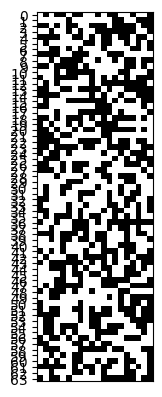

In [13]:
map = np.vstack(SETS)
plt.imshow(map, cmap="binary")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show();

In [3]:
def goal_check(state): # function to check if we found a set cover
    return len(state.taken) > 0 and np.all(reduce(np.logical_or, [SETS[i] for i in state.taken])) 

assert goal_check(State(set(range(NUM_SETS)), set())), "Problem not solvable" # check if the problem is solvable

In [4]:
def distance(state, mask=np.array([True for _ in range(PROBLEM_SIZE)])):
    curr_cover = reduce(np.logical_or, [SETS[i] for i in state.taken], [False for _ in range(PROBLEM_SIZE)])
    return np.sum(mask) - np.sum(np.logical_and(curr_cover, mask))

In [5]:
def find_solution(dist_func = distance, cost_func=lambda s: 0, initial_cost=PROBLEM_SIZE, verbose=True):
    frontier = queue.PriorityQueue()
    frontier.put((initial_cost, State(set(), set(range(NUM_SETS)))))  #initial state
    _, curr_state = frontier.get()
    counter = 0
    while not goal_check(curr_state):
        counter += 1
        for action in curr_state.not_taken:
            new_state = State(curr_state.taken ^ {action}, curr_state.not_taken ^ {action}) #using XOR for both operations
            heur = dist_func(new_state) + cost_func(new_state)
            frontier.put((heur, new_state))
        _, curr_state = frontier.get()
    if verbose:
        print("Found solution", curr_state.taken ,"in", counter, "steps.\nCost:", len(curr_state.taken))
        print("Solution:")
        for taken in curr_state.taken:
            print(SETS[taken].astype(int))
    
    return len(curr_state.taken), counter

## Breadth First


In [6]:
breadth_cost, breadth_steps = find_solution(lambda s:0, lambda s:len(s.taken))

Found solution {43, 22} in 2939 steps.
Cost: 2
Solution:
[1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1]
[1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0]


## Greedy Best First

In [7]:
gbf_cost, gbf_steps = find_solution()

Found solution {2, 3, 13} in 3 steps.
Cost: 3
Solution:
[1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1]
[0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1]
[1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1]


## A*

The metric used to calculate the priority is

    f(n) = c(n) + h(n)

- c is the cost
- d is the heuristic (distance)

### First approach

- c = number of sets taken
- d = number of spots left to fill

In [8]:
def cost(state):
    return len(state.taken)

In [9]:
find_solution(distance, cost);

Found solution {8, 2, 37} in 5 steps.
Cost: 3
Solution:
[0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1]
[0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0]


## Observations:
The first approach doesn't provide any improvement when compared to greedy best first. Let's try adding a weight to each edge traversed.

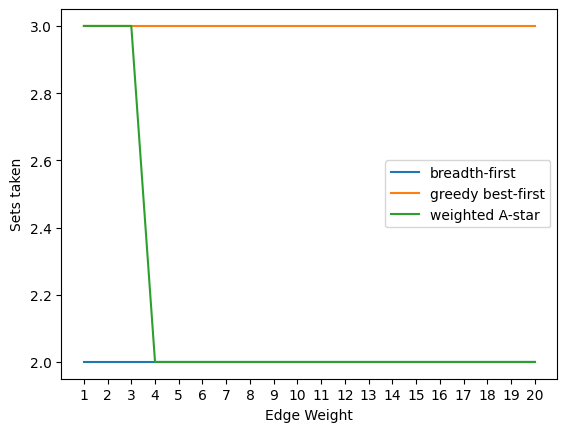

In [10]:
costs = []
steps = []
for w in range(1, PROBLEM_SIZE+1):

    curr_cost, curr_steps = find_solution(distance, lambda s: w * cost(s), verbose=False)
    costs.append(curr_cost)
    steps.append(curr_steps)

plt.plot(range(1, PROBLEM_SIZE+1), [breadth_cost for _ in range(1, PROBLEM_SIZE+1)], label="breadth-first")
plt.plot(range(1, PROBLEM_SIZE+1), [gbf_cost for _ in range(1, PROBLEM_SIZE+1)], label="greedy best-first")
plt.plot(range(1, PROBLEM_SIZE+1), costs, label="weighted A-star")
plt.xticks(np.arange(1, PROBLEM_SIZE+1))
plt.xlabel("Edge Weight")
plt.ylabel("Sets taken")
plt.legend();

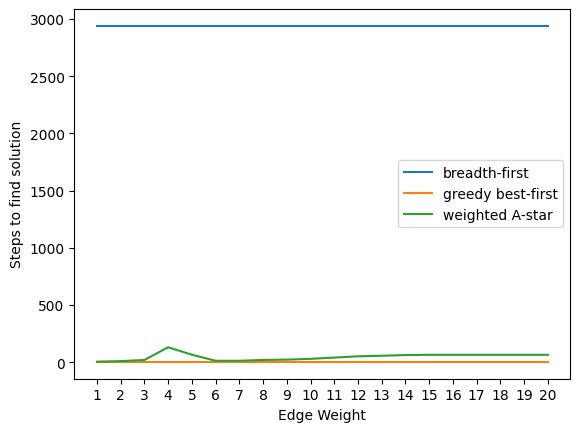

In [11]:
plt.plot(range(1, PROBLEM_SIZE+1), [breadth_steps for _ in range(1, PROBLEM_SIZE+1)], label="breadth-first")
plt.plot(range(1, PROBLEM_SIZE+1), [gbf_steps for _ in range(1, PROBLEM_SIZE+1)], label="greedy best-first")
plt.plot(range(1, PROBLEM_SIZE+1), steps, label="weighted A-star")
plt.xticks(np.arange(1, PROBLEM_SIZE+1))
plt.xlabel("Edge Weight")
plt.ylabel("Steps to find solution")
plt.legend();